In [4]:
import pandas as pd

melb_df = pd.read_csv('data/melb_data_fe.csv')

# Exercise 1.1
# # Преобразуйте столбец Date в формат datetime и выделите квартал (quarter) продажи объектов 
# недвижимости. Найдите второй по популярности квартал продажи. В качестве ответа запишите число объектов, 
# проданных в этом квартале.


melb_df['Date'] = pd.to_datetime(melb_df['Date'])
melb_df['Date'].dt.quarter.value_counts().index[1]


# Exercise 1.2 
# Преобразуйте все столбцы, в которых меньше 150 уникальных значений, в тип данных category, исключив 
# из преобразования столбцы Date, Rooms, Bedroom, Bathroom, Car.

col_list = ['Date', 'Rooms', 'Bedroom', 'Bathroom', "Car"]

c_count = 0 # Count columns with type CATEGORY
for x in melb_df.columns:
    if x not in col_list and melb_df[x].nunique()<150:
        melb_df[x] = melb_df[x].astype('category')
        c_count += 1
c_count = 0

for x in melb_df.dtypes.value_counts().index:
    if x == 'category':
        c_count += 1
        
display(c_count)

# Exercise 2.2
# Произведите сортировку столбца AreaRatio по убыванию. При этом индексы полученной таблицы замените на 
# новые. Какое значение площади здания находится в строке 1558? Ответ округлите до целого числа. 


round(melb_df.sort_values(by='AreaRatio', ignore_index=True)['BuildingArea'][1558-1])


# Exercise 2.3
# Найдите таунхаусы (Type) с количеством жилых комнат (Rooms) больше 2. Отсортируйте полученную таблицу 
# сначала по возрастанию числа комнат, а затем по убыванию средней площади комнат (MeanRoomsSquare). 
# Индексы таблицы замените на новые. Какая цена будет у объекта в строке 18? Ответ запишите в виде целого числа


melb_df[(melb_df['Type']=='townhouse') & (melb_df['Rooms']>2)].\
    sort_values(by=['Rooms', 'MeanRoomsSquare'], ascending=[True, False] ,ignore_index=True)['Price'][18]
    

# Exercise 3.1
# Сгруппируйте данные по признаку количества комнат и найдите среднюю цену объектов недвижимости в каждой 
# группе. В качестве ответа запишите количество комнат, для которых средняя цена наибольшая.


melb_df.groupby('Rooms')['Price'].mean().sort_values(ascending=False).index[0]


# Exercise 3.2
# Какой регион имеет наименьшее стандартное отклонение по географической широте (Lattitude)?
# В качестве ответа запишите название этого региона.


melb_df.groupby('Regionname')['Lattitude'].std().sort_values().index[0]


# Exercise 3.3
# Какая риелторская компания (SellerG) имеет наименьшую общую выручку за период 
# с 1 мая по 1 сентября (включительно) 2017 года?
# Для ответа на этот вопрос рассчитайте сумму продаж (Price) каждой компании в заданный период.

melb_df[(melb_df['Date'] <= pd.to_datetime('2017-09-01')) & (melb_df['Date'] > pd.to_datetime('2017-05-01'))]\
    .groupby('SellerG')['Price'].sum().sort_values(ascending=True).index[0]
    
    
# Exercise 4.2
# Составьте сводную таблицу, которая показывает зависимость медианной площади (BuildingArea) здания от типа 
# объекта недвижимости (Type) и количества жилых комнат в доме (Rooms). Для какой комбинации признаков площадь 
# здания наибольшая?
# В качестве ответа запишите эту комбинацию (тип здания, число комнат) через запятую, без пробелов.


pivot = melb_df.pivot_table(
    index='Rooms',
    values='BuildingArea',
    columns=['Type','SellerG','Car'],
    aggfunc='median',
    fill_value=0
)
display(pivot.max(axis = 0).sort_values().index[-1])
display(pivot.max(axis = 1).sort_values().index[-1])


# Exercise 4.3
# Составьте сводную таблицу, которая показывает зависимость медианной цены объекта недвижимости (Price) 
# от риелторского агентства (SellerG) и типа здания (Type).
# Во вновь созданной таблице найдите агентство, у которого медианная цена для зданий типа unit максимальна. 
# В качестве ответа запишите название этого агентства.

pivot_S_T = melb_df.pivot_table(
    values='Price',
    index='SellerG',
    columns='Type',
    aggfunc='median',
    fill_value=0
).sort_values(by='house', ascending=False).round()

display(pivot_S_T.sort_values(by='unit').index[-1])




10

('house', 'Raine', 5)

5

'Nick'

In [5]:
import pandas as pd
import os

ratings1 = pd.read_csv('data/ratings1.csv', sep=',')
ratings2 = pd.read_csv('data/ratings2.csv', sep=',')
dates = pd.read_csv('data/dates.csv', sep=',')
movies = pd.read_csv('data/movies.csv', sep=',')

# Exercise 5.2
movies['movieId'].nunique()

# Exercise 5.3
ratings1['userId'].nunique()

# Exercise 5.4
dates['date'] = pd.to_datetime(dates['date'])
dates['date'].dt.year.mode()

ratings = pd.concat([ratings1, ratings2], ignore_index=True)
ratings = ratings.drop_duplicates(ignore_index=True)
ratings_dates = pd.concat([ratings, dates], axis=1)
print(os.listdir('data/'))

def concat_user_files(path):
    result = pd.DataFrame()
    data_list = os.listdir(path)
    for x in data_list:
        if x == 'ratings1.csv' or x == 'ratings2.csv':
            x = path + x
            result = pd.concat([result, pd.read_csv(x)], ignore_index=True)
            result = result.drop_duplicates(ignore_index=True)
    return result
concat_user_files('data/')



['dates.csv', 'melb_data_fe.csv', 'movies.csv', 'orders.csv', 'products.csv', 'ratings1.csv', 'ratings2.csv', 'ratings_movies.csv']


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [7]:
import pandas as pd

items_df = pd.DataFrame({
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 100132, 312394], 
    'vendor': ['Samsung', 'LG', 'Apple', 'Apple', 'LG', 'Apple', 'Samsung', 'Samsung', 'LG', 'ZTE'],
    'stock_count': [54, 33, 122, 18, 102, 43, 77, 143, 60, 19]
})

purchase_df = pd.DataFrame({
    'purchase_id': [101, 101, 101, 112, 121, 145, 145, 145, 145, 221],
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 103845, 100132], 
    'price': [13900, 5330, 38200, 49990, 9890, 33000, 67500, 34500, 89900, 11400]
})

merged = items_df.merge(purchase_df, how='inner', on='item_id')
income = merged['price'].sum()
income

263710

12-8

<AxesSubplot: xlabel='year_release'>

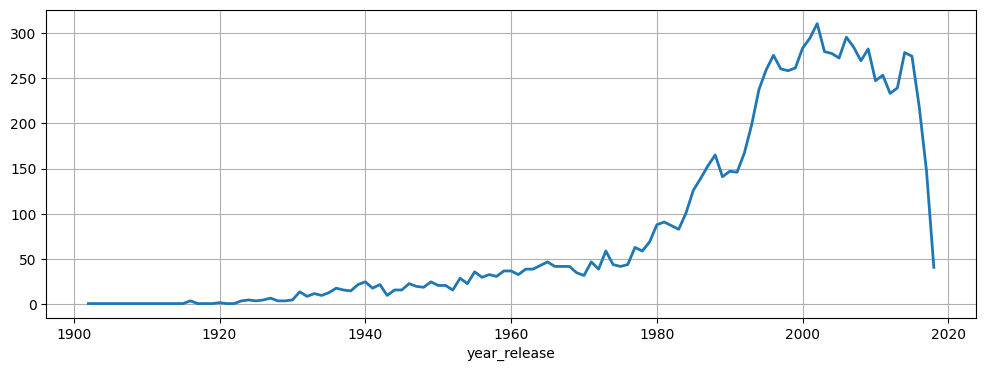

In [24]:
import pandas as pd
import re

def get_year_release(arg):
    #находим все слова по шаблону "(DDDD)"
    candidates = re.findall(r'\(\d{4}\)', arg) 
    # проверяем число вхождений
    if len(candidates) > 0:
        #если число вхождений больше 0,
	#очищаем строку от знаков "(" и ")"
        year = candidates[0].replace('(', '')
        year = year.replace(')', '')
        return int(year)
    else:
        #если год не указан, возвращаем None
        return None
    
ratings_movies = pd.read_csv('data/ratings_movies.csv')

ratings_movies['year_release'] = ratings_movies['title'].apply(get_year_release)

# 'userId', 'movieId', 'rating', 'date', 'title', 'genres','year_release'

# Exercise 8.1
# Сколько фильмов с неуказанным годом релиза?

ratings_movies['year_release'].notnull().value_counts()[False]


# Exercise 8.2
# Какой фильм, выпущенный в 1999 году, получил наименьшую среднюю оценку зрителей?
# В качестве ответа запишите название этого фильма без указания года его выпуска.    

temp_df = ratings_movies[ratings_movies['year_release'] == 1999].sort_values('rating')
temp_df = temp_df.groupby(by='title')['rating'].mean()
temp_df.sort_values().index[0]


# Exercise 8.3
# Какое сочетание жанров фильмов (genres), выпущенных в 2010 году, 
# получило наименьшую среднюю оценку (rating)?

temp_df = ratings_movies[ratings_movies['year_release'] == 2010].sort_values('rating')
temp_df = temp_df.groupby(by='genres')['rating'].mean()
temp_df.sort_values().index[0]


# Exercise 8.4
# Какой пользователь (userId) посмотрел наибольшее количество различных (уникальных) 
# комбинаций жанров (genres) фильмов? В качестве ответа запишите идентификатор этого пользователя.

ratings_movies.pivot_table(
    index='userId',
    values='genres',
    aggfunc='nunique',
    fill_value=0
).sort_values(by='genres', ascending=False).index[0]


# Exercise 8.5
# Найдите пользователя, который выставил наименьшее количество оценок, 
# но его средняя оценка фильмам наибольшая

ratings_movies.groupby('userId')['rating'].agg(['count', 'mean']).\
    sort_values(
        by=['count', 'mean'], 
        ascending=[True, False]
        ).index[0]
    

# Exercise 8.6
# Найдите сочетание жанров (genres) за 2018 году, которое имеет наибольший средний рейтинг 
# (среднее по столбцу rating), и при этом число выставленных ему оценок (количество значений 
# в столбце rating) больше 10.

temp_df = ratings_movies[ratings_movies['year_release'] == 2018]
temp_df = temp_df.groupby('genres')['rating'].agg(['count', 'mean'])
temp_df[temp_df['count'] > 10].sort_values(by='mean', ascending=False).index[0]


# Exercise 8.7
# Добавьте в таблицу новый признак year_rating — год выставления оценки. Создайте сводную таблицу, 
# которая иллюстрирует зависимость среднего рейтинга фильма от года выставления оценки и жанра.

ratings_movies['date'] = pd.to_datetime(ratings_movies['date'])
ratings_movies['year_rating'] = ratings_movies['date'].dt.year
pivot_rating = ratings_movies.pivot_table(
    index=['genres', 'year_rating'],
    values='rating',
    aggfunc='mean',
    fill_value=0
)
pivot_rating.loc['Comedy'].sort_values('rating')

ratings_movies

year_m = ratings_movies[ratings_movies['year_release'] >= 1900].groupby('year_release')['title'].nunique()
year_m.plot(
    kind='line',
    figsize=(12,4),
    grid=True,
    lw=2
)

In [84]:
import pandas as pd
import numpy

orders = pd.read_csv('data/orders.csv', sep=';')
products = pd.read_csv('data/products.csv', sep=';')

orders['Product_ID'] = orders['ID товара']
orders = orders.drop(columns='ID товара')

orders_products = orders.merge(
    products,
    on='Product_ID',
    how='left'
)


# Exercise 8.7
orders_products = orders_products.fillna(0)
orders_products[orders_products['Name'] == 'NaN']


# Exercise 8.8
orders_products[orders_products['Отменен'] == 'Да']


# Exercise 8.9

orders_products['Price'] = orders_products['Price'].astype('int64')
orders_products.groupby('ID Покупателя')['Price'].sum().sort_values()



ID Покупателя
10      199
9       344
1       448
8       697
5     14042
7     17096
Name: Price, dtype: int64